# Generador de Código C para Keil µVision5


* Esta jugada genera automaticamente fragmentos de codigo C (plantillas) para configurar perifericos comunes en microcontroladores ARM Cotes de 32 Bits, de las familias STM32, NXP, Texas Instruments, entre otros.

* La herramineta permite elegir fabricante, modelo de micro, periferico y puerto y/o Bit de entrada y/o salida

* Aplica arquitectura orientada a vainas, implementa al menos 5 patrones de diseño (Factory, Strategy, Adapter, Builder, Facade / plugin Registry) y al menos se lograron tres principios SOLID


## Diagrama de bloques
![Diagrama de bloques.png](<attachment:Diagrama de bloques.png>)
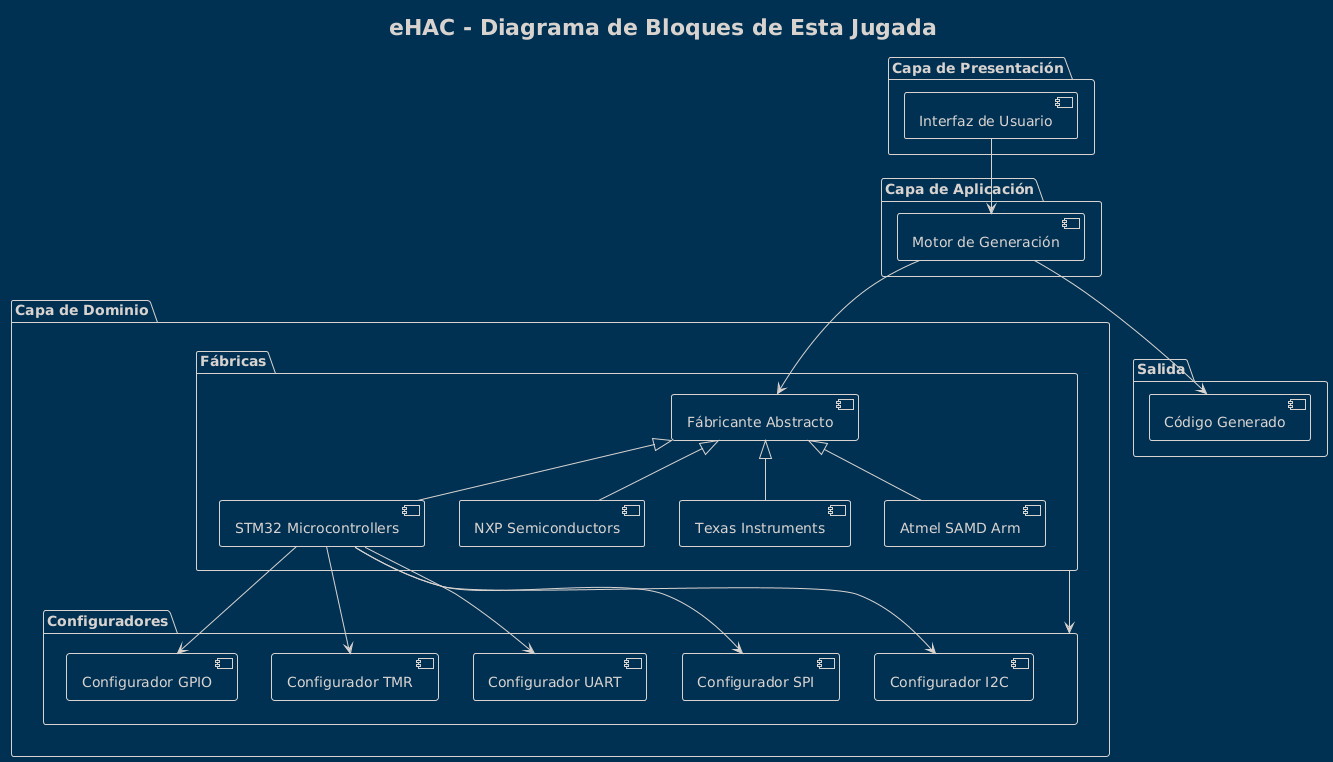

* Capa de Presentación

    - Contiene la Interfaz de Usuario.

    - Recibe los parámetros del usuario y los envía hacia la capa de aplicación
* Capa de Aplicacion
    - Contiene el Motor de Generación.
    - Actúa como intermediario entre la interfaz de usuario y la lógica de dominio.
    - Organiza el flujo: recibe datos, invoca las fábricas/configuradores y obtiene el código generado.
* Capa de Dominio.
    - Es el nucleo de la logica y contiene:
        - Fabricas: Para crear objetos especificos segun fabricante.
        - Configuradores: Para construir secciones de codigo GPIO, UART, CAN, etc.
        - Fabrica Abstracta: Define la interfaz comun para todas las familias de microcontroladores.
* Salida
    - Representa el codigo generado final que produce la herramienta. 

## Diagrama de clases
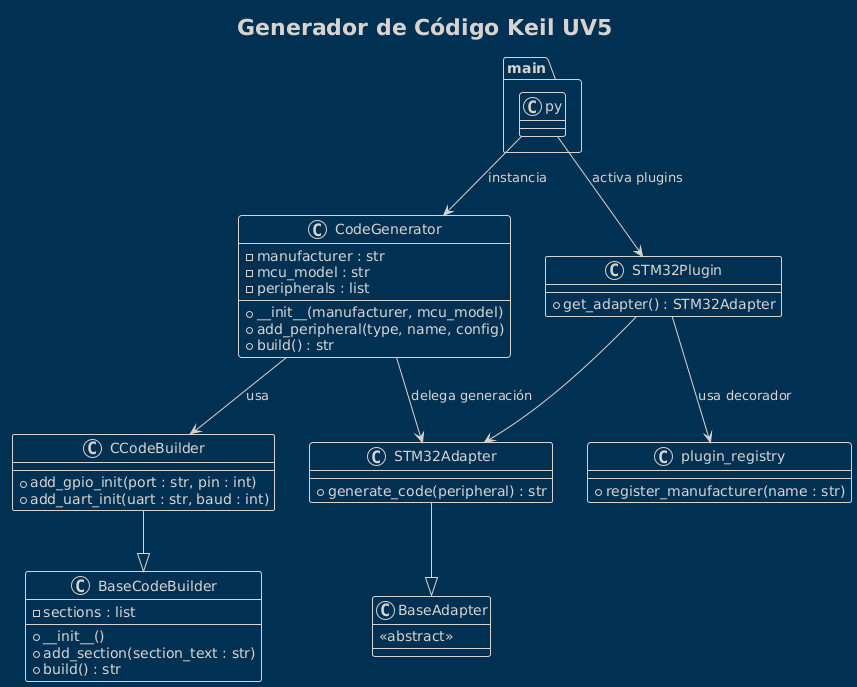



https://cdn-0.plantuml.com/plantuml/png/XPJDRjim3CVlVWhjD1ThTzYmIz45JGsZ29PbGPmEw4bW9DOL8Ck6H0qBjZrL7w4lDZbMQZlh4X_oGVx97sbIkdO4bdobapVqY1MoZVROM6Ke8KKQsIqQj21hooIoxFb9gh9cNr1fTlVzKvAyPPzVVu8dcq-Bl63BrMoHpPRJULuSaGiDph6ibjWHAH1_9Imy5wm2unz0aBTesILpPFSEuNaLGlJ8sg1LpMF8eLsmQ-LevtZ7E5T64UVfCE5vd-Kiwa1AtYT9QTlWEJDGXKzHcmTLxeKRhxHCpoBzJnAxk067RISthHlxFXmAKhNvNrL3V9IcyPiJ_gGESuATZS5znh9HzOwKDhMDkSvPeqpugGmDuHuiTL8FlNG3NaPjZolMNpz-M6fVAlD2Av4uI6W8RLjVfvbsXZvoQEr3kzaZ5w6Bj9_1gwzu77nr1PiW0K6JIT0TtSpb_EvsjYZOFLlbjxDYlRe_kPdDhaTkiLI1idsfk3EWvSETIjjbYUCwLSigdq-psRT5Nh1yiLxbyTWSYHcD-EBYz-HmuPB1L89WCfx0y4yVllUEJs0RFC9TCkzWBFg744GIDPOGnodKyvCvhEdmXNQPGw2eTzTDKe4oxvljJZlcjJle28nGC58D2443WjGFY1YN9DTeP7lF_GK0

#### Explicación una miguita simplista 

1. _main.py_ punto de entrada, solicitando datos y organizando el flujo.

2. _CodeGenerator_ es la clase central que coordina la generación de código.

3. _CCodeBuilder_ hereda de _BaseCodeBuilder_: aqui se aplica patrón Builder para construir código por secciones.

4. _STM32Plugin_ aplica el patrón _Plugin/Registry_, devolviendo un _STM32Adapter_.

5. _STM32Adapter_ hereda de _BaseAdapter_: aqui se aplica el patrón Adapter, generando código específico por MCU.

6. plugin_registry gestiona el registro de fabricantes mediante decoradores.


+ Cabe aclarar que en el diagrama solo se representa la estructura del plugin y adaptador STM32, pero esta arquitectura es exactamente la misma vaina para NXP, TI, Atmel SAMD o el que sea, cada uno tiene su propia clase _Plugin y Adapter_, registradas en el _plugin_ _registry_; como quien dice  __"Es el mismo perro pero con distinta cabulla"__ de esta manera, se aplica el patrón Plugin + Adapter de forma extensible para múltiples fabricantes sin modificar el núcleo de la herramienta.”

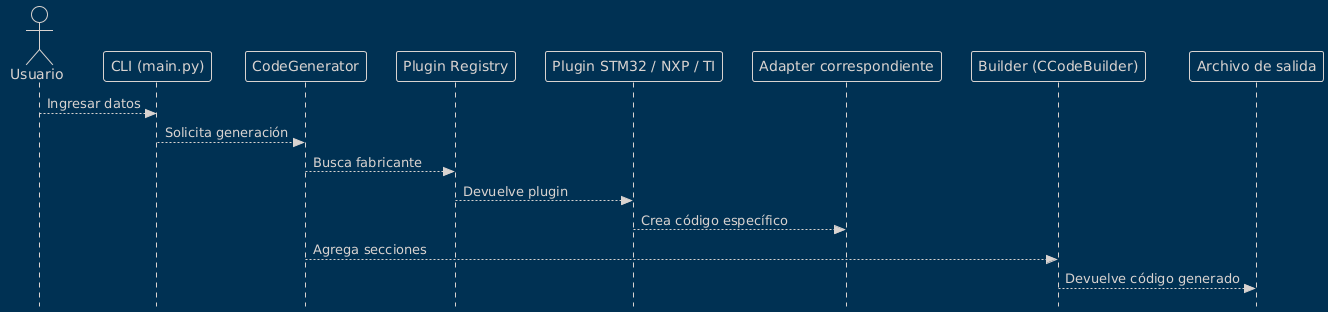

https://cdn-0.plantuml.com/plantuml/png/TP3FIWCn4CRlUOgnftgeWjuyIFy8Kb0fjeBNwMIQ3cQJPP8K-b2U-WXzCNVN1Mcnbs4ty_i-vll6AQFcKdbpbRTSCQnzuLebP9E-9DIeM47AUy_DLA4E_TjGhEeOEEHbXoXJnk0y6uEKey97AgWIZUa_O3HwXC7iPGx32YNSrFlh0Jp0F3ZbX0eMSqp6d1E_gcZvcGDhmsYhMaOl91d1TQyanqCmvrWdNVZY9C0xEsbIx5lnj2H2sE1QXJ1aDkVGgNIvUhs_Wrju-rmqSpLlBPvuLzZl6EgECPVPpcbYiSwiG56LKrER5GwPMwUPCW8T3rPSX6R7TFpU24NpVvnf4MzPOJXhj_rVL-J4AJk4n4GI0oTpYUrFKjhABe9bIEZ5uaci_g2-NXlDc8CjbVy1


### Asi funciona la jugada

1. El Usuario ejecuta python -m app.main (CLI).

2. Se piden: __manufacturer, mcu_model, peripheral_type, name, mode, pin__ ( Aqui se hacen algunas   validaciones básicas y se normaliza la entrada, como quien dice "todo a mayúsculas").

3. Se crea CodeGenerator(__manufacturer, mcu_model__) (actúa como facade y coordina).

4. __PeripheralFactory.create()__ crea un objeto Peripheral.

5. CodeGenerator solicita a __CodeGenerationStrategy(manufacturer, mcu_model)__ el adaptador/plugin apropiado (mediante el registry).

6. El adaptador genera las líneas de C pertinentes que el __CCodeBuilder__ compone como salida.

7. Se imprime el código en consola.

## POO: características y evidencia, al menos aguna vaina se pudo demostrar

1. ### Abstracción
* __BaseAdapter__ define una interfaz abstracta __generate_code__ que oculta detalles de implementación.
----> archivo __base_adapter.py__ con método abstracto.

2. ### Encapsulamiento
* Cada adaptador __(stm32_adapter.py, nxp_adapter.py, ti_adapter.py)__ contiene la logica especifica del fabricante, separada del core.
Por ejemplo: __STM32Adapter.generate_code(...), NXPAdapter.generate_code(...) etc.__

3. ### Herencia y polimorfismo
* Todos los adaptadores heredan de __BaseAdapter__ y sobree scriben __generate_code__, por lo tanto, el __core__ usa __BaseAdapter__ osea, __Polimorfismo.__
* Por ejemplo, __Class STM32Adapter(BaseAdapter):__ y usa __adapter = plugin_cls().get_adapter(); adapter.generate_code(peripheral).__ 

## Principios SOLID mas o menos probados

### Single Responsability
__Cada clase tiene una unica responsabilidad:__
* __CCodeGenerator:__ Coordina el flujo, es decir: Recibe la entrada del usuario(Fabricante, Modelo, periferico, Pin, etc) Selecciona el __Plugin__ correspondiente al fabricante (STM32, NXP, TI) para generar el codigo fuente, y devuelve el codigo generado, como quien dice; coordina la interaccion entre los componentes:

* __STM32Adapter / NXPAdapter / TIAdapter__, generan el codigo|

* __CCodeBuilder__ Estructura y concatena el codigo final, "Cambios en el formato de salida afecta solo a los builders y los cambios en un fabricante, afecta solo a su adapter."

### Open/Closed 
* El nucleo no requiere modificacion para afregar un nuevo fabricante o periferico, solo basta con añadir un __Adapter__ y un __Plugin__ y sale pa pintura.
* Por ejemplo __registry.py & <el que sea>_plugin.py.CodeGenerationStrategy__ usa __get_plugin(Fabricante).__

### Dependency Inversion
* El __CodeGenerator__ y __Strategy__ depende de abstracciones __(BasaAdapter y plugin registry)__ y no de implemntaciones concretas.
* Por ejemplo, __CodeGenerationStrategy__ obtiene la clase del __plugin__ y el __core__ solo usa la interfaz.

## Este va a parecer parapeto pero tiene su logica
### Substitucion de Liskov
* Los adaptadores sustituyen a __BaseAdapter__ sin romper el flujo; __generate_code__ devuelve Strings que __CCodeBuilder__ acepta y usa.
* Por ejemplo, __strategy.py__ usa __self.adapter.generate_code(peripheral)__ y le importa una gaver el daptador que sea (NXP, STM32, el que sea).

# Patrones de diseño
 
## Factory method - Creacional
Define la interfaz para crear los objetos (en este caso, los adaptadores de fabricantes), lo que le permite a las subclases decidir qué clase instanciar, de esta forma, el generador principal no necesita conocer los detalles de cómo se crean los objetos.
Esto permite extender el sistema con nuevos fabricantes sin modificar el núcleo de la aplicación.

In [ ]:
# app/plugins/registry.py

import importlib

plugin_registry: dict = {}

def register_manufacturer(name: str):
    def decorator(cls):
        plugin_registry[name.upper()] = cls
        return cls
    return decorator

def get_plugin(name: str):
    key = name.upper()
    if key not in plugin_registry:
        raise ValueError(f"Fabricante '{name}' no registrado")
    return plugin_registry[key]

def register_all_plugins(plugin_module_names: list = None):
    if plugin_module_names is None:
        plugin_module_names = [
            "app.plugins.stm32_plugin",
            "app.plugins.nxp_plugin",
            "app.plugins.ti_plugin",
        ]

    for mod_name in plugin_module_names:
        try:
            importlib.import_module(mod_name)
        except Exception as e:
            print(f"No se pudo cargar plugin '{mod_name}': {e}")

La función __register_all_plugins()__ actúa como mecanismo dinámico de importacion; al importar módulos, los decoradores __@register_manufacturer__ ejecutan el registro de cada plugin en el diccionario __plugin_registry__.

Por ejemplo, aqui se ve claramente el uso del decorador para registrar el plugin “TI” en la fábrica, y
de manera similar están nxp_plugin.py y stm32_plugin.py

In [ ]:
# app/plugins/ti_plugin.py

from app.plugins.registry import register_manufacturer
from app.adapters.ti_adapter import TIAdapter

@register_manufacturer("TI")
class TIPlugin:
    def get_adapter(self):
        return TIAdapter()

* __plugin_registry__	Catálogo central para instancias disponibles
* __register_manufacturer__	Método de registro que enlaza nombre <---> clase
* __get_plugin()__	Fábrica que devuelve la clase adecuada
* __register_all_plugins()__	Mecanismo para descubrir e importar fábricas
* __TIPlugin, NXPPlugin, STM32Plugin__	Subclases concretas creadas por la fábrica

## Startegy - Comportamiento

Define diferentes metodos para la generación del código (uno por fabricante) y permite elegirlos dinámicamente en tiempo de ejecución, manteniendo una interfaz común, favoreciendo la extensibilidad y evitando estructuras if/elif chancletuas.
 

In [ ]:
# app/strategy.py
# Esta jugada es el núcleo de la estrategia

class CodeGenerationStrategy:
    def __init__(self, manufacturer: str, mcu_model: str = None):
        self.manufacturer = manufacturer
        self.mcu_model = mcu_model
        plugin_cls = get_plugin(manufacturer)
        self.adapter = plugin_cls().get_adapter()

    def generate(self, peripheral):
        return self.adapter.generate_code(peripheral)

Aquí __CodeGenerationStrategy__ no genera el código directamente, sino que delega la generación al __adapter__ adecuado, que es quien representa la “estrategia concreta”.

Por ejemplo: __TIAdapter__ es una estrategia concreta para generar código de GPIO en microcontroladores Texas Instruments.

In [ ]:
# app/adapters/ti_adapter.py

from app.adapters.base_adapter import BaseAdapter

class TIAdapter(BaseAdapter):
    def generate_code(self, peripheral):
        name = peripheral.name.upper()
        pin = peripheral.config.get("pin")
        mode = peripheral.config.get("mode").upper()

        bit_macro = f"BIT{pin}"
        lines = []
        if mode == "OUTPUT":
            lines.append(f"{name}->DIR |= {bit_macro};      // Configurar {name}.{pin} como salida")
            lines.append(f"{name}->OUT ^= {bit_macro};      // Toggle de {name}.{pin}")
        elif mode == "INPUT":
            lines.append(f"{name}->DIR &= ~{bit_macro};     // Configurar {name}.{pin} como entrada")
            lines.append(f"{name}->REN |= {bit_macro};      // Habilitar resistencia interna")
            lines.append(f"{name}->OUT |= {bit_macro};      // Configurar como pull-up")
        return "\n".join(lines)


En resumen:
* __CodeGenerationStrategy__	Clase que delega la generación a la estrategia concreta
* __STM32Adapter, NXPAdapter, TIAdapter__	Estrategias concretas que implementan __generate_code()__
* __BaseAdapter__	Interfaz común para todas las estrategias
* __CodeGenerator__	Cliente que utiliza la estrategia sin conocer detalles internos
* __main.py + registry.py__	Selección dinámica de la estrategia en tiempo de ejecución

## Adapter - Estructura
* El generador espera que cada fabricante (STM32, NXP, TI, etc.) se comporte igual: debe poder generar código C para periféricos GPIO, UART, CAN, I2C etc.
* Pero cada fabricante tiene registros y sintaxis distintas, por eso usas adaptadores específicos que traducen la solicitud genérica en código concreto.

In [ ]:
# Adaptador Texas Instruments

from .base_adapter import BaseAdapter

class TIAdapter(BaseAdapter):
    def generate_code(self, peripheral):
        name = peripheral.name.upper()       # Ej: P1
        pin = peripheral.config.get("pin")   # Ej: 0
        mode = peripheral.config.get("mode").upper()

        # Validacion de puerto (P1, P2, etc.) y BITx
        if not name.startswith("P"):
            raise ValueError(f"Nombre de puerto '{name}' inválido para TI (debe comenzar con 'P').")
        
        if pin < 0 or pin > 7:
            raise ValueError(f"Error: Pin {pin} fuera de rango (0-7) cachon")
        # BITn → n es el número del pin
        bit_macro = f"BIT{pin}"

        lines = []
        if mode == "OUTPUT":
            lines.append(f"{name}->DIR |= {bit_macro};      // Configurar {name}.{pin} como salida")
            lines.append(f"{name}->OUT ^= {bit_macro};      // Toggle de {name}.{pin}")
        elif mode == "INPUT":
            lines.append(f"{name}->DIR &= ~{bit_macro};     // Configurar {name}.{pin} como entrada")
            lines.append(f"{name}->REN |= {bit_macro};      // Habilitar resistencia interna")
            lines.append(f"{name}->OUT |= {bit_macro};      // Configurar como pull-up")
        else:
            raise ValueError(f"Modo '{mode}' no soportado para TI.")

        return "\n".join(lines)


* __BaseAdapter__| define la interfaz esperada por el generador de código __(método generate_code)__.

* __TIAdapter, NXPAdapter, STM32Adapter__ implementan esa interfaz adaptándola a cada fabricante.

* El generador no necesita conocer los detalles de cada MCU; simplemente llama __adapter.generate_code(alguna_vaina)__ y obtiene código listo para Keil.

In [ ]:
Ejemplo: Cuando el usuario ejecuta la jugada

Fabricante: ti
MCU_model: msp432p401r
Tipo de periférico: gpio
Nombre: p1
Modo: output
Número de pin: 13


El sistema selecciona TIAdapter y genera:

P1->DIR |= BIT13;      // Configurar P1.13 como salida
P1->OUT ^= BIT13;      // Toggle de P1.13

# Buider - Creacional
Este patrón se aplica para construir progresivamente el código C de inicialización, separando la lógica de generación en pasos bien definidos, es decir, agregando (CAN, I2C, GPIO, UART, etc.) en lugar de hacerlo todo en un único bloque rígido; esto permite agregar secciones de manera flexible y luego ensamblar el resultado final de forma ordenada.

In [ ]:
# base_builder.py

class BaseCodeBuilder:
    def __init__(self):
        self.sections = []

    def add_section(self, section_text):
        self.sections.append(section_text)

    def build(self):
        return "\n".join(self.sections)

# c_code_builder.py

from .base_builder import BaseCodeBuilder

class CCodeBuilder(BaseCodeBuilder):
    def add_gpio_init(self, port, pin):
        self.add_section(f"// Configurar GPIO {port}{pin}\n")

    def add_uart_init(self, uart, baud):
        self.add_section(f"// Configurar UART {uart} a {baud} baudios\n")

* __BaseCodeBuilder__ define la estructura básica y el proceso de construcción paso a paso.

* __CCodeBuilder__ extiende la funcionalidad con métodos puntuales para distintos componentes.

* El objeto se va armando con __add_section()__ en varias llamadas, y finalmente se obtiene el resultado con __build()__.
* Se separa la creación de la jugada (agregar secciones) del codigo final.

## Template Method - Comportamiento
El patrón Template Method define la estructura general (osea el esqueleto) en una clase base, mientras que las subclases concretas completan pasos específicos sin cambiar la estructura general.
* La clase __BaseCodeBuilder__ define el esqueleto de construcción de código:
    * __add_section()__ para agregar fragmentos.
    * __build()__ para ensamblar el resultado final.
    * En pocas palabras esta es la “plantilla” que determina cómo se construye el código final.
* La subclase __CCodeBuilder__ implementa pasos concretos:
    * __add_gpio_init()__ y __add_uart_init()__ agregan secciones específicas para C, pero no modifican el flujo general de construcción.

In [ ]:
# Base (plantilla)

class BaseCodeBuilder:
    def build(self):
        return "\n".join(self.sections)

# Subclase (pasos concretos)
class CCodeBuilder(BaseCodeBuilder):
    def add_gpio_init(self, port, pin):
        self.add_section(f"// Configurar GPIO {port}{pin}\n")

En Conclusión, la estructura se define en la superclase y los detalles se completan en las subclases.

* __BaseCodeBuilder.build()__ = método plantilla.

* __CCodeBuilder.add_gpio_init() y add_uart_init()__ = pasos específicos definidos por subclases.

## Factory / Abstract Factory - Creacional
El patrón Factory Method aqui se encarga de centralizar la creación de objetos, delegando la decisión de qué clase instanciar a una función o clase “factory”.

En este caso:
* Los plugins de fabricantes se registran en __plugin_registry__ usando el decorador __@register_manufacturer__.
* Cuando el sistema necesita un plugin, no instancia directamente la clase: llama a:
    * __get_plugin(manufacturer_name)__
      __plugin = cls()__
    * De esta forma, __get_plugin()__ actúa como Factory Method.
* __register_all_plugins()__ importa dinámicamente varios módulos de plugins y permite tener distintas “familias” de plugins (STM32, NXP, TI, etc.), lo que basicamente es "Abstract Factory"
    * Cada módulo define sus propias clases.
    * __registry__ ofrece un punto único y abstracto para obtener cualquier fábrica.

In [ ]:
# Registry.py

def get_plugin(name: str):
    key = name.upper()
    if key not in plugin_registry:
        raise ValueError(f"Fabricante '{name}' no registrado")
    return plugin_registry[key]  # Devuelve la clase correspondiente

Entonces: 
* __get_plugin()__ = Factory Method: devuelve la clase adecuada según un identificador.

* __register_all_plugins() + el sistema de módulos__ = Abstract Factory: permite manejar familias de plugins sin conocer sus clases concretas.